In [ ]:
from google.colab import files
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
uploaded=files.upload()

Saving normal.jpeg to normal.jpeg


(1167, 1384)


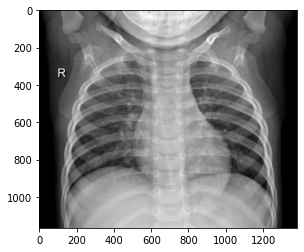

In [ ]:
img=cv.imread('normal.jpeg')
img=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
#plt.imshow(img)
print(img.shape)


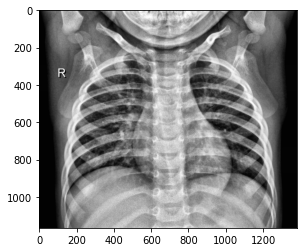

In [ ]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.imshow(cl1, cmap='gray', vmin=0, vmax=255)

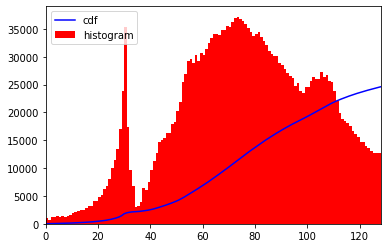

In [ ]:

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,128])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
#plt.imshow(img)


In [ ]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

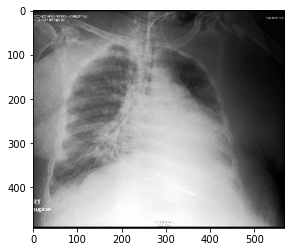

In [ ]:
#3img = cv2.imread('wiki.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(equ, cmap='gray', vmin=0, vmax=255)
#cv.imwrite('res.png',res)